In [7]:
import pickle as pkl
import numpy as np

In [1]:
animal = 'ST263'
dayN = 5
day_name = 'Day{}'.format(dayN)
exp_pref = '{}_{}'.format(animal,day_name)
out_dir = '../models/'+exp_pref
with open(out_dir+'/summary.pkl','rb') as f:
    data = pkl.load(f)

In [4]:
copulas = {}
for d in data.reshape(-1):
    if d is not None:
        try:
            copulas[d[1]] += 1
        except KeyError:
            copulas[d[1]] = 1

In [5]:
[copulas['Independence'],copulas['Gaussian'],copulas['Frank']]

[304, 13, 21]

In [8]:
import re

copula_names = ['Independence','Gaussian','Frank','Clayton','Gumbel']
new_dict = {}

for key, value in copulas.items():
    binary_key = np.zeros(len(copula_names)).astype(int) #4 types of copulas
    for i, name in enumerate(copula_names):
        if re.search(name,key):
            binary_key[i]+=1
    new_key = ''.join([str(b) for b in binary_key])
    try:
        new_dict[new_key] += value
    except KeyError:
        new_dict[new_key] = value

In [9]:
new_dict

{'10000': 304,
 '01010': 2,
 '00110': 9,
 '00100': 21,
 '10010': 2,
 '01000': 13,
 '01100': 6,
 '10100': 9,
 '10110': 2,
 '00101': 1,
 '01110': 1,
 '01011': 1,
 '01001': 2,
 '00001': 2,
 '10001': 1,
 '11100': 1,
 '10101': 1}

In [10]:
copulas

{'Independence': 304,
 'GaussianClayton270°': 1,
 'Clayton0°FrankClayton270°': 1,
 'Clayton0°Frank': 4,
 'Frank': 21,
 'Clayton90°IndependenceClayton0°': 1,
 'Gaussian': 13,
 'FrankGaussian': 6,
 'IndependenceFrank': 9,
 'IndependenceClayton180°Frank': 1,
 'Clayton270°Frank': 1,
 'Gumbel0°Frank': 1,
 'FrankClayton180°': 2,
 'Clayton180°FrankGaussian': 1,
 'GaussianClayton180°Gumbel0°': 1,
 'GaussianGumbel0°': 2,
 'Clayton180°IndependenceFrank': 1,
 'Clayton90°Frank': 1,
 'Gumbel0°': 2,
 'Gumbel0°Independence': 1,
 'Clayton180°Gaussian': 1,
 'IndependenceFrankGaussian': 1,
 'Gumbel0°IndependenceFrank': 1,
 'IndependenceClayton180°': 1}

Text(0,0.5,'time, min')

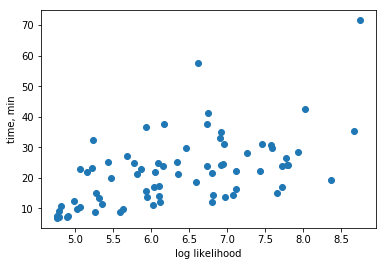

In [21]:
import matplotlib.pyplot as plt
waic, time = [], []
for d in data.reshape(-1):
    if d is not None:
        if int(d[2])!=0:
            waic.append(np.log(int(d[2])))
            time.append(int(d[3])/60)
plt.scatter(waic,time)
plt.xlabel('log likelihood')
plt.ylabel('time, min')